In [13]:
%matplotlib inline

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv(r'C:\Users\George\Desktop\football-match-prediction\feature-enginnering\premier-league.csv')


In [15]:
df.head()

,Unnamed: 0,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,HCONC,AATT,ACONC,HomeTeamPoints,AwayTeamPoints,HomeTeamForm,AwayTeamForm,FTR-A,FTR-D,FTR-H
0,0,2012/2013,2012-08-18,Arsenal,Sunderland,0.0,0.0,D,14.0,3.0,...,0.0,0.0,0.0,0,0,-----,-----,0.0,1.0,0.0
1,1,2012/2013,2012-08-18,Fulham,Norwich,5.0,0.0,H,11.0,4.0,...,0.0,0.0,0.0,0,0,-----,-----,0.0,0.0,1.0
2,2,2012/2013,2012-08-18,Newcastle,Tottenham,2.0,1.0,H,6.0,12.0,...,0.0,0.0,0.0,0,0,-----,-----,0.0,0.0,1.0
3,3,2012/2013,2012-08-18,QPR,Swansea,0.0,5.0,A,20.0,12.0,...,0.0,0.0,0.0,0,0,-----,-----,1.0,0.0,0.0
4,4,2012/2013,2012-08-18,Reading,Stoke,1.0,1.0,D,9.0,6.0,...,0.0,0.0,0.0,0,0,-----,-----,0.0,1.0,0.0


In [16]:
df.tail()

,Unnamed: 0,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,HCONC,AATT,ACONC,HomeTeamPoints,AwayTeamPoints,HomeTeamForm,AwayTeamForm,FTR-A,FTR-D,FTR-H
3795,3796,2021/2022,2022-05-22,Crystal Palace,Man United,1.0,0.0,H,6.0,10.0,...,0.944444,1.388889,1.888889,45,58,LDWWD,LWDLL,0.0,0.0,1.0
3796,3797,2021/2022,2022-05-22,Leicester,Southampton,4.0,1.0,H,12.0,7.0,...,1.222222,1.055556,2.166667,49,40,DWWLL,LLLDL,0.0,0.0,1.0
3797,3798,2021/2022,2022-05-22,Liverpool,Wolves,3.0,1.0,H,29.0,7.0,...,0.444444,0.944444,0.833333,89,51,WWDWW,DLDLL,0.0,0.0,1.0
3798,3799,2021/2022,2022-05-22,Man City,Aston Villa,3.0,2.0,H,24.0,4.0,...,0.722222,1.166667,1.222222,90,45,DWWWW,DDLWW,1.0,0.0,0.0
3799,3800,2021/2022,2022-05-22,Norwich,Tottenham,0.0,5.0,A,9.0,19.0,...,2.111111,1.444444,1.166667,22,68,DLLLL,WWDWD,NaN,NaN,NaN


In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3800.0,1900.200000,1097.473653,0.00,949.750000,1900.500000,2850.250000,3800.00
FTHG,3800.0,1.517632,1.307320,0.00,1.000000,1.000000,2.000000,9.00
FTAG,3800.0,1.218947,1.189123,0.00,0.000000,1.000000,2.000000,9.00
HS,3800.0,13.976579,5.638652,0.00,10.000000,13.000000,17.000000,43.00
AS,3800.0,11.357895,4.880765,0.00,8.000000,11.000000,14.000000,31.00
HST,3800.0,5.034737,2.933294,0.00,3.000000,5.000000,7.000000,20.00
AST,3800.0,4.150000,2.522471,0.00,2.000000,4.000000,6.000000,20.00
HC,3800.0,5.845789,3.097249,0.00,4.000000,5.000000,8.000000,19.00
AC,3800.0,4.727105,2.699771,0.00,3.000000,4.000000,6.000000,17.00
HF,3800.0,10.524474,3.394238,0.00,8.000000,10.000000,13.000000,24.00


First we are going to plot some generic information of the Engalnd Premier League

Text(0, 0.5, 'Total Goals')

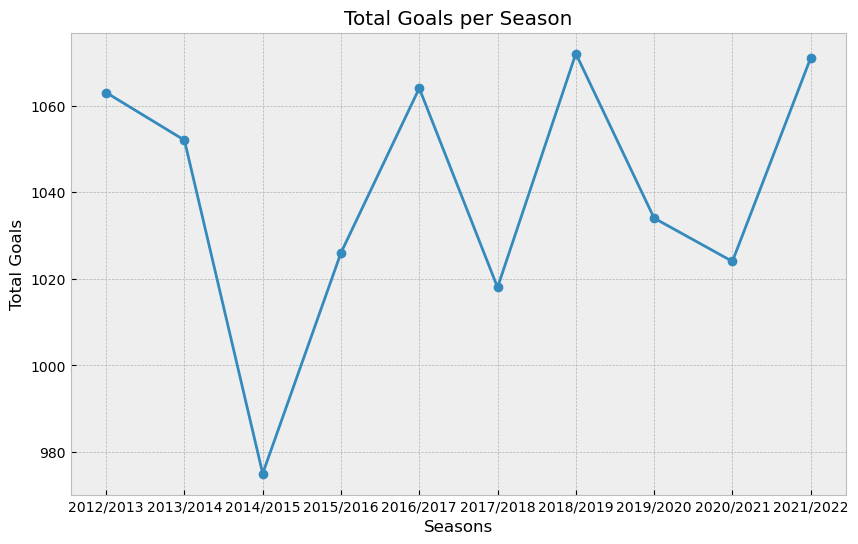

In [18]:
#figure resize
plt.figure(figsize=(10,6))

plt.plot(df['season'].unique(), df.groupby('season')['FTHG'].sum() + df.groupby('season')['FTAG'].sum(), marker = 'o')

plt.style.use('bmh')
plt.title('Total Goals per Season')
plt.xlabel('Seasons')
plt.ylabel('Total Goals')

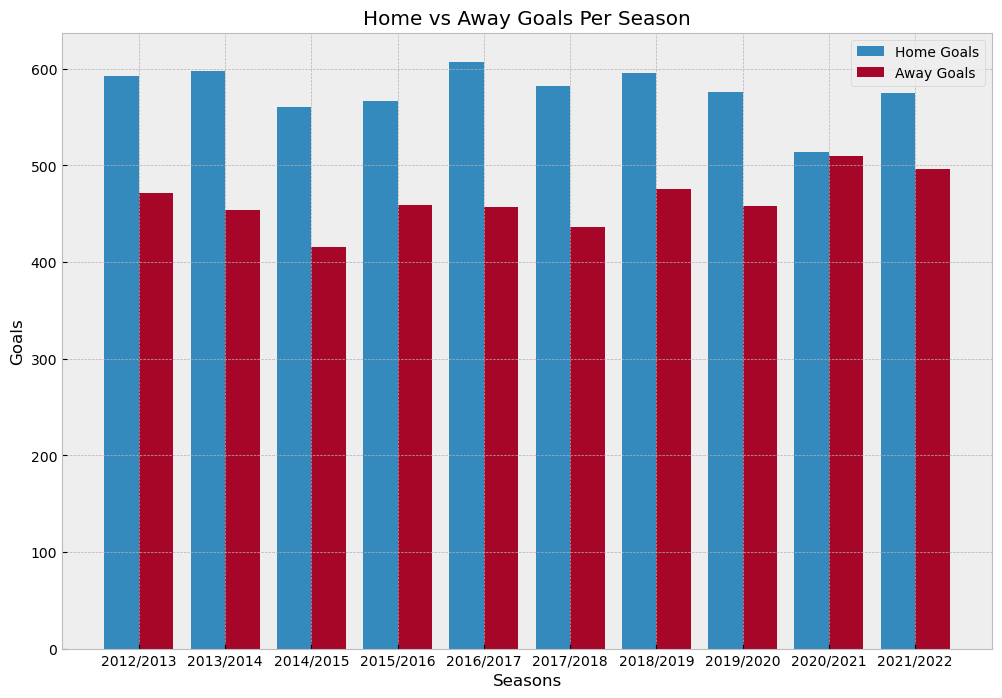

In [19]:
plt.figure(figsize=(12,8))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTHG'].sum(),0.4, label = 'Home Goals')
plt.bar(X_axis + 0.2, df.groupby('season')['FTAG'].sum(),0.4, label = 'Away Goals')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Goals Per Season')
plt.xlabel('Seasons')
plt.ylabel('Goals')

plt.legend()

We can see that most of the time the sum of the number of goals for the home team is much higher than this of the away team. Only at season 2020-2021 the amount of goals for the home and away teams are almost the same, maybe that has to do with the absence of football fans due to covid measures. 

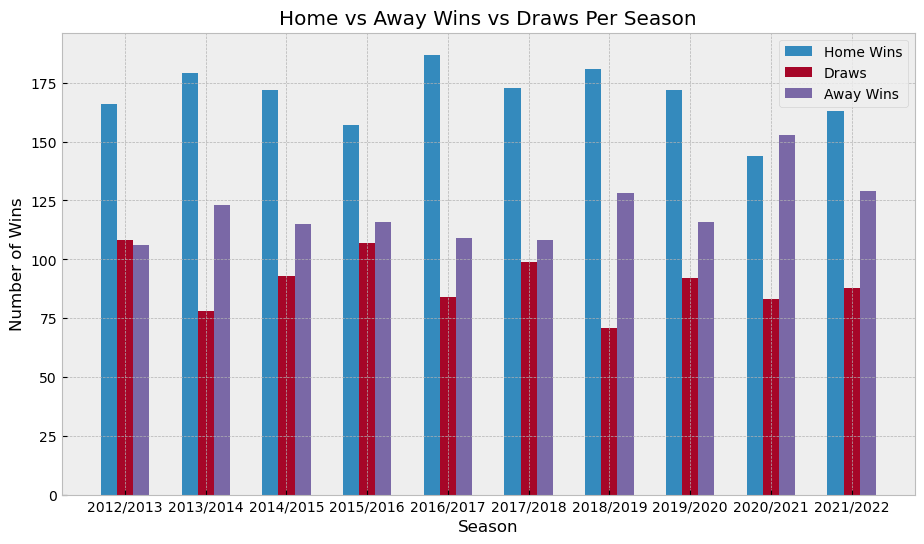

In [20]:
plt.figure(figsize=(11,6))

X_label = df['season'].unique()
X_axis = np.arange(len(df['season'].unique()))

plt.bar(X_axis - 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'H').sum()),0.2, label = 'Home Wins')
plt.bar(X_axis, df.groupby('season')['FTR'].apply(lambda x: (x == 'D').sum()),0.2, label = 'Draws')
plt.bar(X_axis + 0.2, df.groupby('season')['FTR'].apply(lambda x: (x == 'A').sum()),0.2, label = 'Away Wins')

plt.style.use('bmh')
plt.xticks(X_axis, X_label)
plt.title('Home vs Away Wins vs Draws Per Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.legend()

During the season 2020/2021 where almost all matches had to be played behind closed doors, we observe
that the number of wins of away teams is higher than the number of wins of the home teams.



We are going to see the top performing teams at home turf.

Text(0.5, 1.0, 'Top five scoring teams at home')

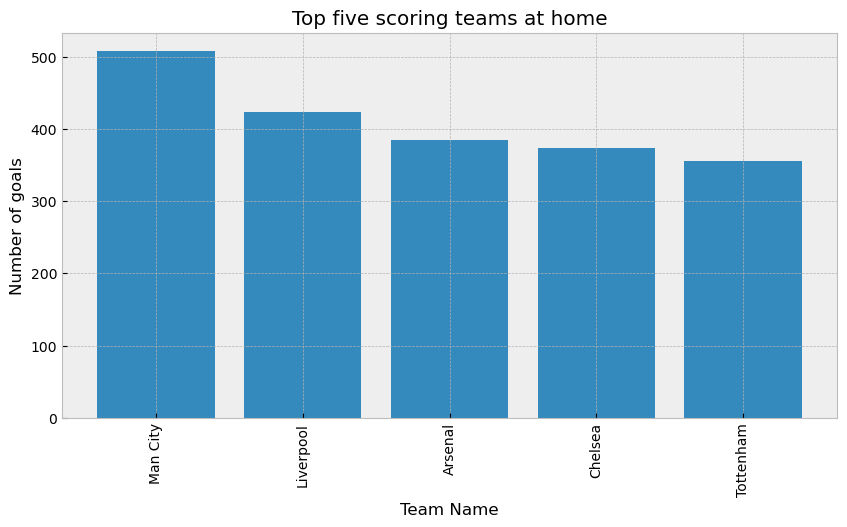

In [21]:
X_label = df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTHG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top five scoring teams at home')

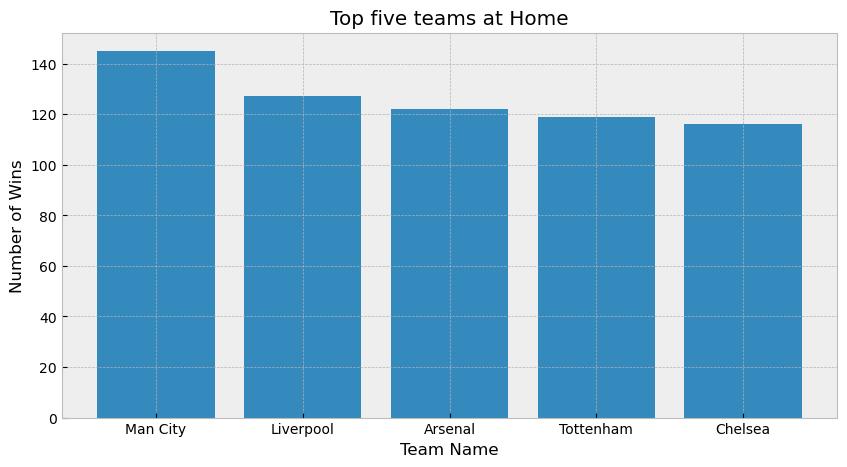

In [22]:
X_label = df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('HomeTeam')['FTR'].apply(lambda x: (x == 'H').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top five teams at Home')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

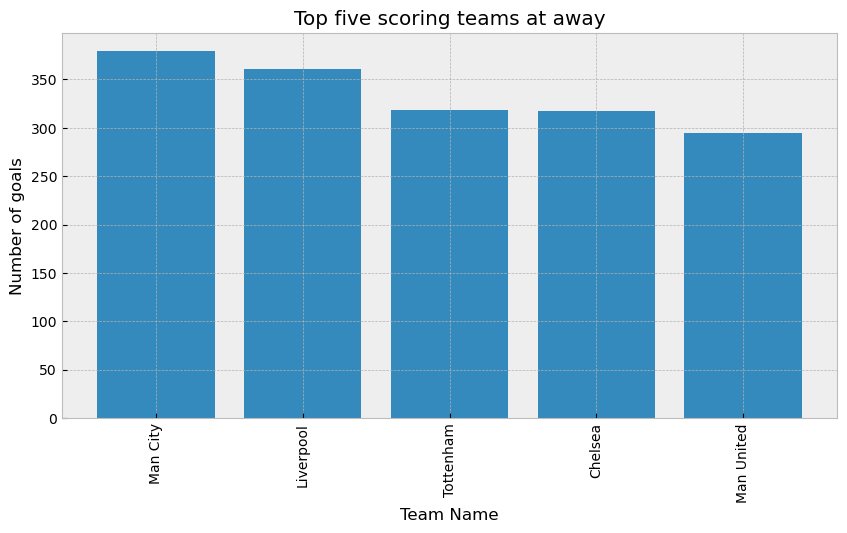

In [23]:
X_label = df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTAG'].sum().sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label, rotation = 'vertical')
plt.xlabel('Team Name')
plt.ylabel('Number of goals')
plt.title('Top five scoring teams at away')

plt.show()

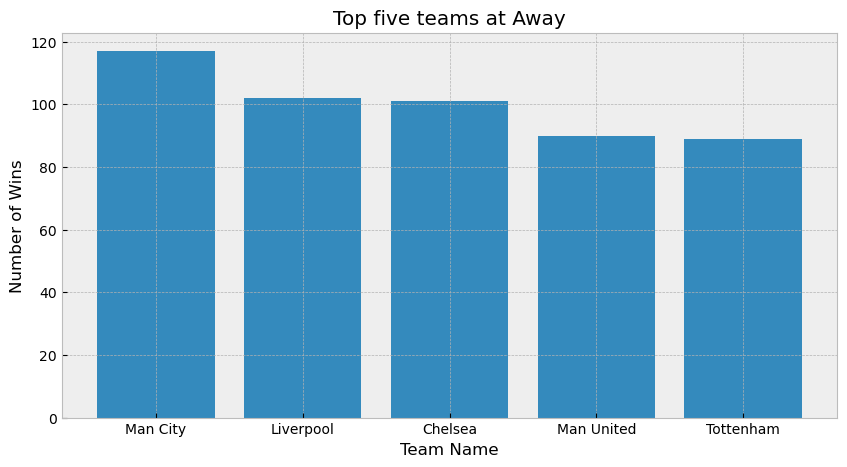

In [24]:
X_label = df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5).index

plt.figure(figsize=(10,5))

plt.bar(range(5),df.groupby('AwayTeam')['FTR'].apply(lambda x: (x == 'A').sum()).sort_values(ascending=False).head(5))

plt.style.use('bmh')
plt.xticks(np.arange(5),X_label)
plt.title('Top five teams at Away')
plt.xlabel('Team Name')
plt.ylabel('Number of Wins')

plt.show()

2021/22:City
2020/21:City
2019/20:Liverpool
2018/19:City
2017/18:City
2016/17:Chealsea
2015/16:Leichester
2014/15:Chealsea
2013/14:City
2012/13:United

We want to check if the team with the best attack wins the EPL

In [25]:
team_home_scored = df.groupby(['season','HomeTeam'])['FTHG'].sum()
team_home_scored = team_home_scored.rename_axis(['Season','Team Name'])

team_away_scored = df.groupby(['season','AwayTeam'])['FTAG'].sum()
team_away_scored = team_away_scored.rename_axis(['Season','Team Name'])


team_goals_scored = team_home_scored + team_away_scored

best_goalscoring_team = team_goals_scored.loc[team_goals_scored.groupby(level=0).idxmax()]

best_goalscoring_team


Season     Team Name 
2012/2013  Man United     86.0
2013/2014  Man City      102.0
2014/2015  Man City       83.0
2015/2016  Man City       71.0
2016/2017  Tottenham      86.0
2017/2018  Man City      106.0
2018/2019  Man City       95.0
2019/2020  Man City      102.0
2020/2021  Man City       83.0
2021/2022  Man City       99.0
dtype: float64

We can see that not always the team which scored the most goals wins the EPL.

In [26]:
team_home_conceded = df.groupby(['season','HomeTeam'])['FTAG'].sum()
team_home_conceded = team_home_conceded.rename_axis(['Season','Team Name'])

team_away_conceded = df.groupby(['season','AwayTeam'])['FTHG'].sum()
team_away_conceded = team_away_conceded.rename_axis(['Season','Team Name'])

#Number of goals each team conceded per season
team_goal_conceded = team_home_conceded + team_away_conceded

best_team_at_defense = team_goal_conceded.loc[team_goal_conceded.groupby(level=0).idxmin()]
best_team_at_defense

Season     Team Name 
2012/2013  Man City      34.0
2013/2014  Chelsea       27.0
2014/2015  Chelsea       32.0
2015/2016  Man United    35.0
2016/2017  Tottenham     26.0
2017/2018  Man City      27.0
2018/2019  Liverpool     22.0
2019/2020  Liverpool     33.0
2020/2021  Man City      32.0
2021/2022  Liverpool     26.0
dtype: float64

In [27]:
overall_stats = team_goals_scored - team_goal_conceded
best_overall_stats = overall_stats.loc[overall_stats.groupby(level=0).idxmax()]
best_overall_stats

Season     Team Name 
2012/2013  Man United    43.0
2013/2014  Man City      65.0
2014/2015  Man City      45.0
2015/2016  Tottenham     34.0
2016/2017  Tottenham     60.0
2017/2018  Man City      79.0
2018/2019  Man City      72.0
2019/2020  Man City      67.0
2020/2021  Man City      51.0
2021/2022  Man City      73.0
dtype: float64

6 out of 10 times the team with the best overall performance at wins the championship. 
So we need to take into consideration both the attacking and defensive performance when
we want to predict a match.

<AxesSubplot:xlabel='FTR', ylabel='count'>

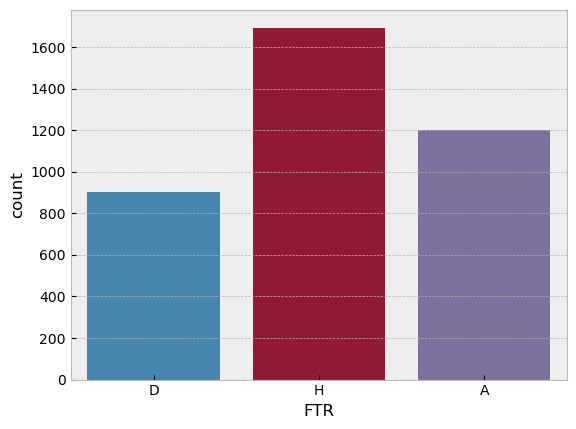

In [28]:
sns.countplot(x='FTR', data=df)

We can see that most of the times the home team wins. That probably has to do with the crowd attendance that gives a boost at home teams.

<AxesSubplot:>

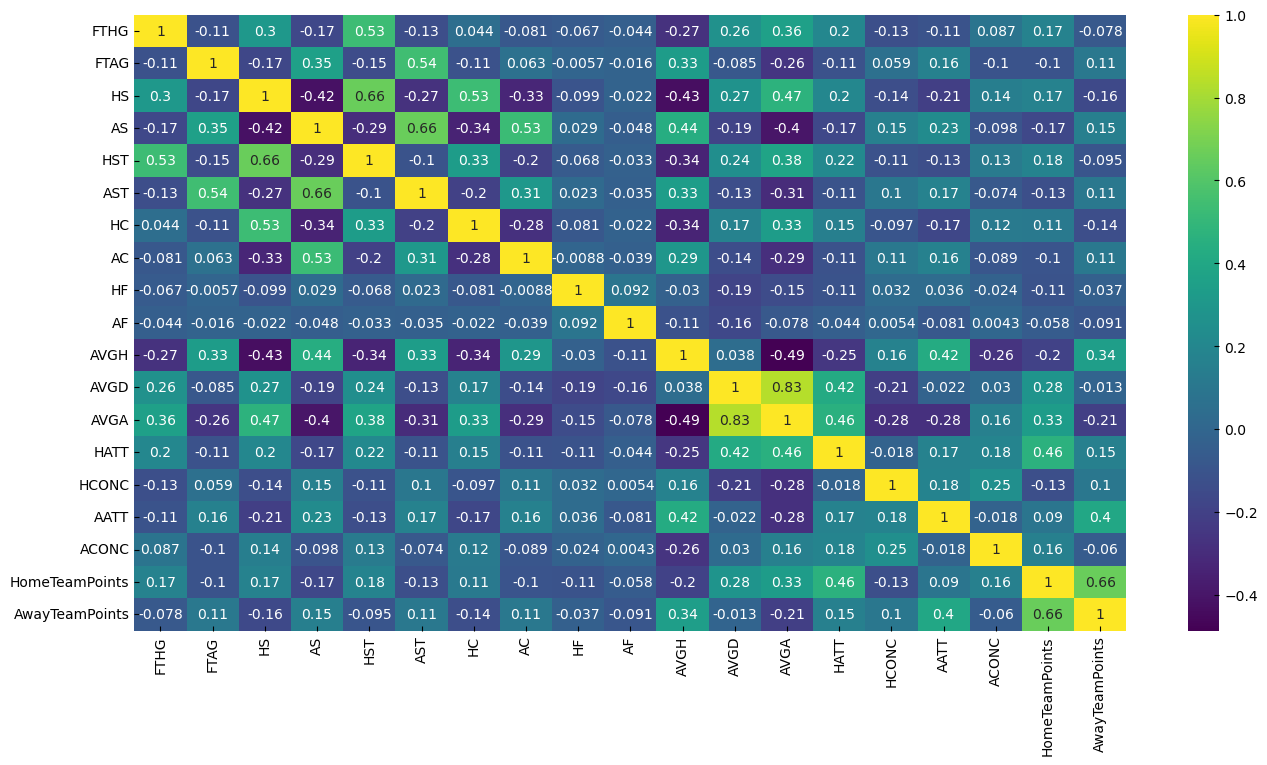

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(df.drop(['Unnamed: 0','season', 'Date', 'HomeTeam', 'AwayTeam', 'FTR-A', 'FTR-H', 'FTR-D'],axis=1).corr(),annot=True, cmap='viridis')

First we are going to explore how some variables are affecting the result of the game. After that we are going to explore how features interacts with one another.

<AxesSubplot:xlabel='AST', ylabel='FTAG'>

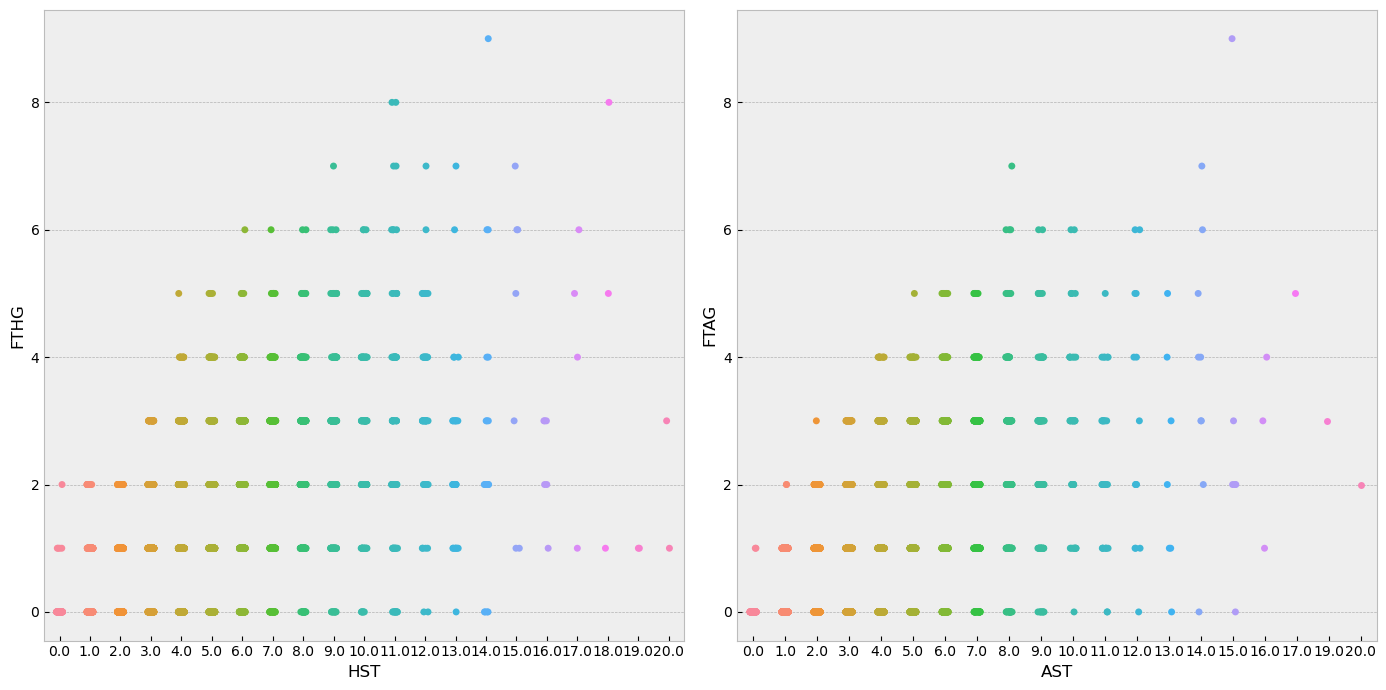

In [31]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.stripplot(x='HST', y='FTHG', data=df, jitter=True, ax=axes[0])
sns.stripplot(x='AST', y='FTAG', data=df, jitter=True, ax=axes[1])

We can see that as the number of shots on target for every team is getting higher, it is more possible to score a goal which is the main factor that affect the game result. Maybe a feature like the average of shots on target from match to match would be a good choice. An interesting insight from the two graphs is that when the home team scored 0 or 1 goals usually led them to te loss of points.

Text(0, 0.5, 'Average Draw Odds')

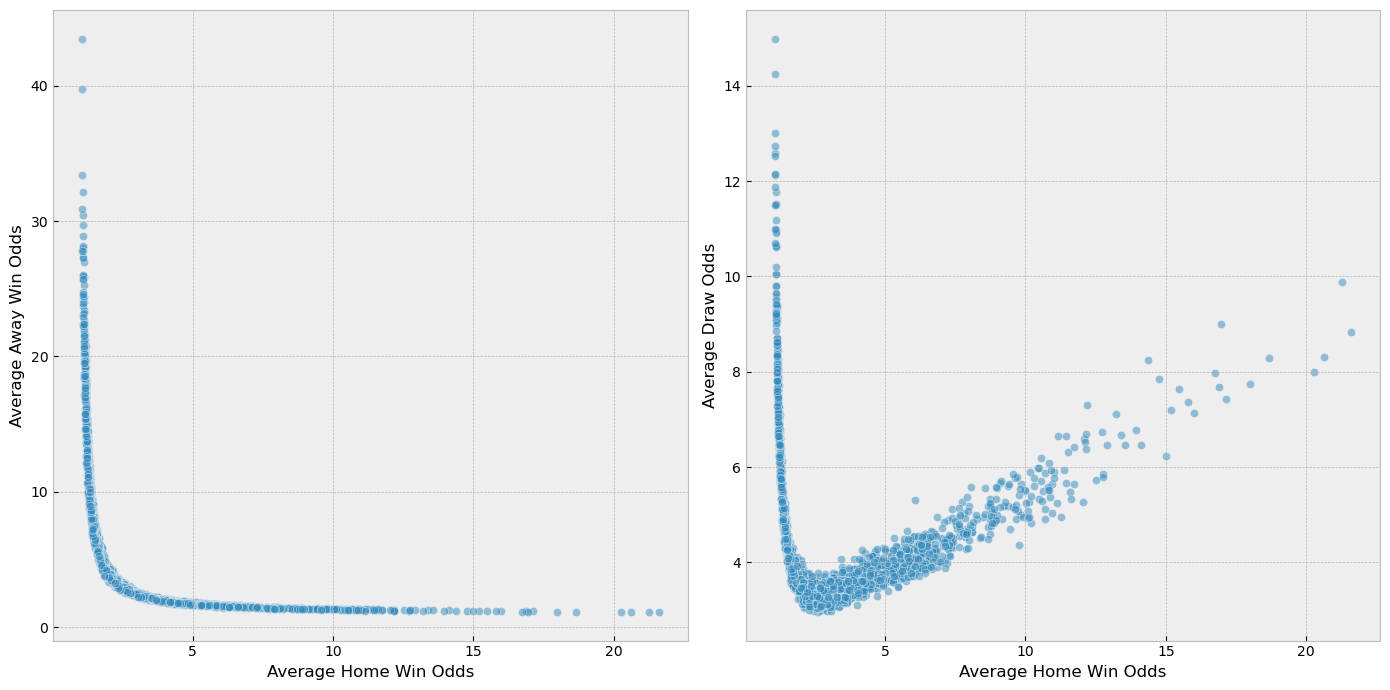

In [32]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [15.00, 6.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='AVGA', data=df, alpha=0.5, ax=axes[0])
axes[0].set_xlabel('Average Home Win Odds')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AVGH', y='AVGD', data=df, alpha=0.5, ax=axes[1])
axes[1].set_xlabel('Average Home Win Odds')
axes[1].set_ylabel('Average Draw Odds')

Text(0, 0.5, 'Average Draw Win Odds')

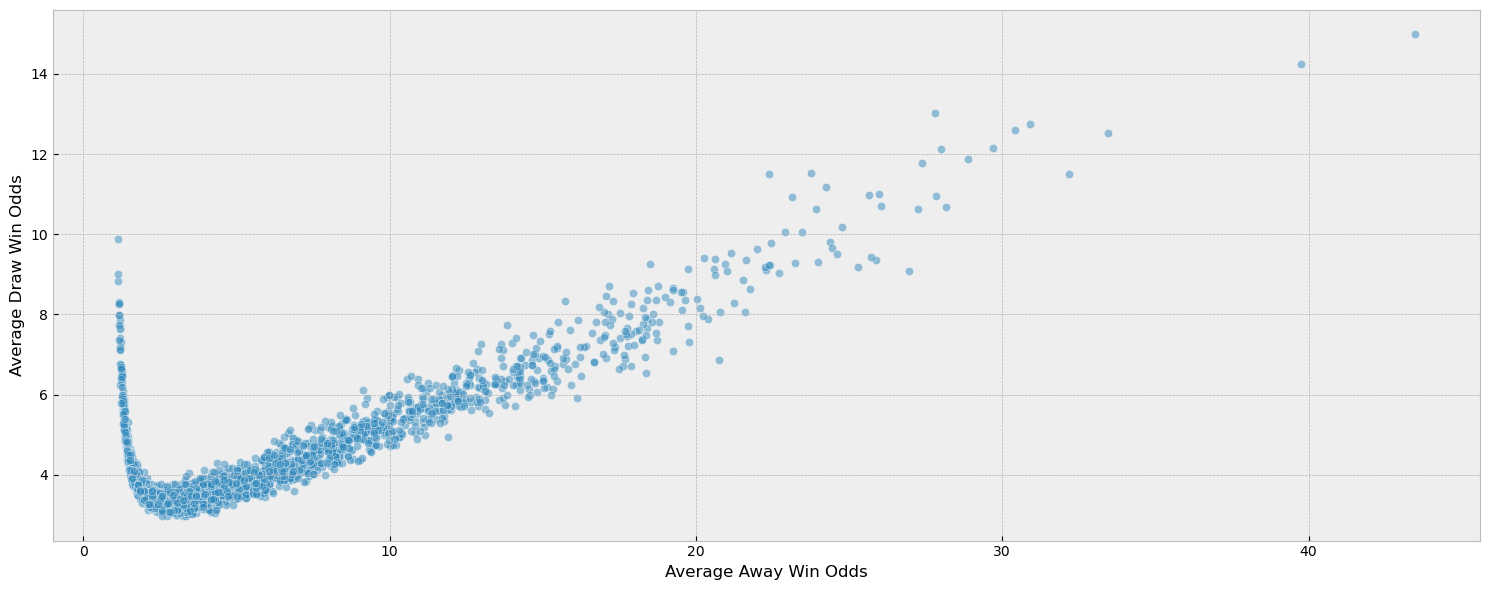

In [33]:
sns.scatterplot(x='AVGA', y='AVGD', data=df, alpha=0.5)
plt.xlabel("Average Away Win Odds")
plt.ylabel("Average Draw Win Odds")

As the price of the home win odd is getting lower the price of the away win odd is getting higher and vice versa. That has to do with the favorite to win the game. When it comes to draw odd it is reasonable to take higher values as the differention of home and and away win odds is getting higher.

Text(0, 0.5, 'Average Away Win Odds')

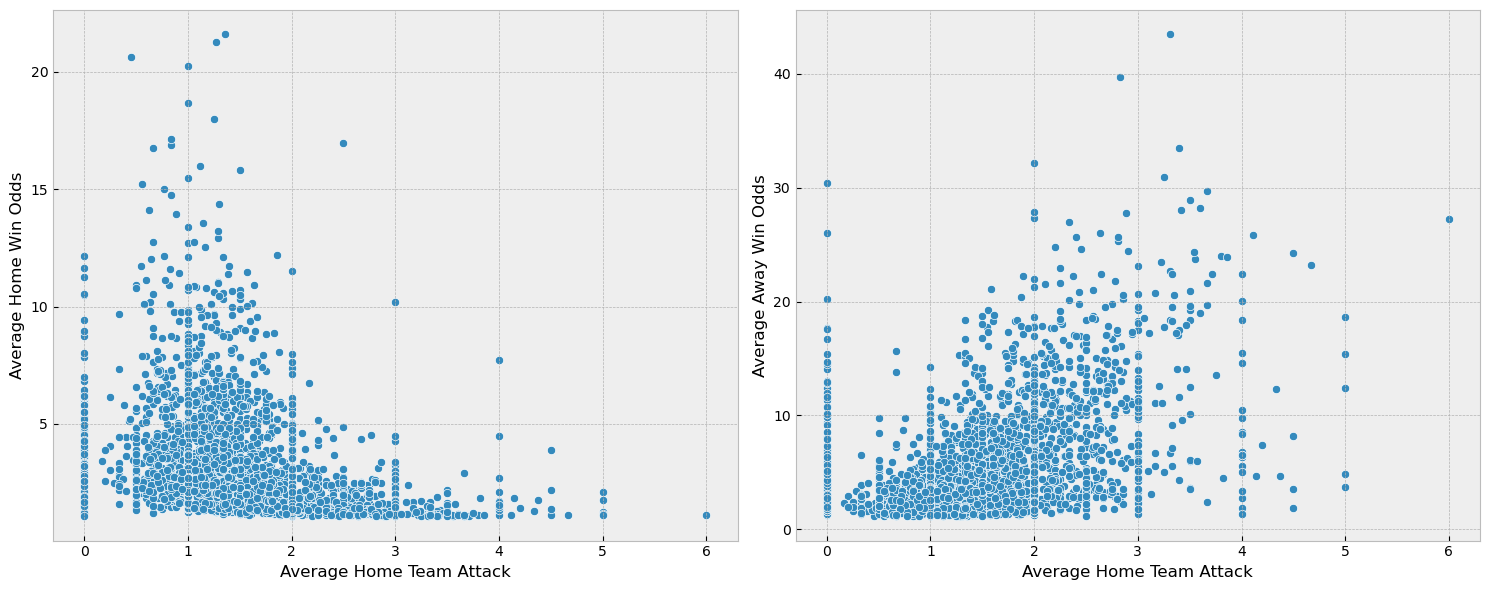

In [34]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HATT', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Attack')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HATT', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Attack')
axes[1].set_ylabel('Average Away Win Odds')

We can see that as the home team attack is getting better, the home win odds are getting lower and the away win odds are getting higher. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

Text(0, 0.5, 'Average Away Win Odds')

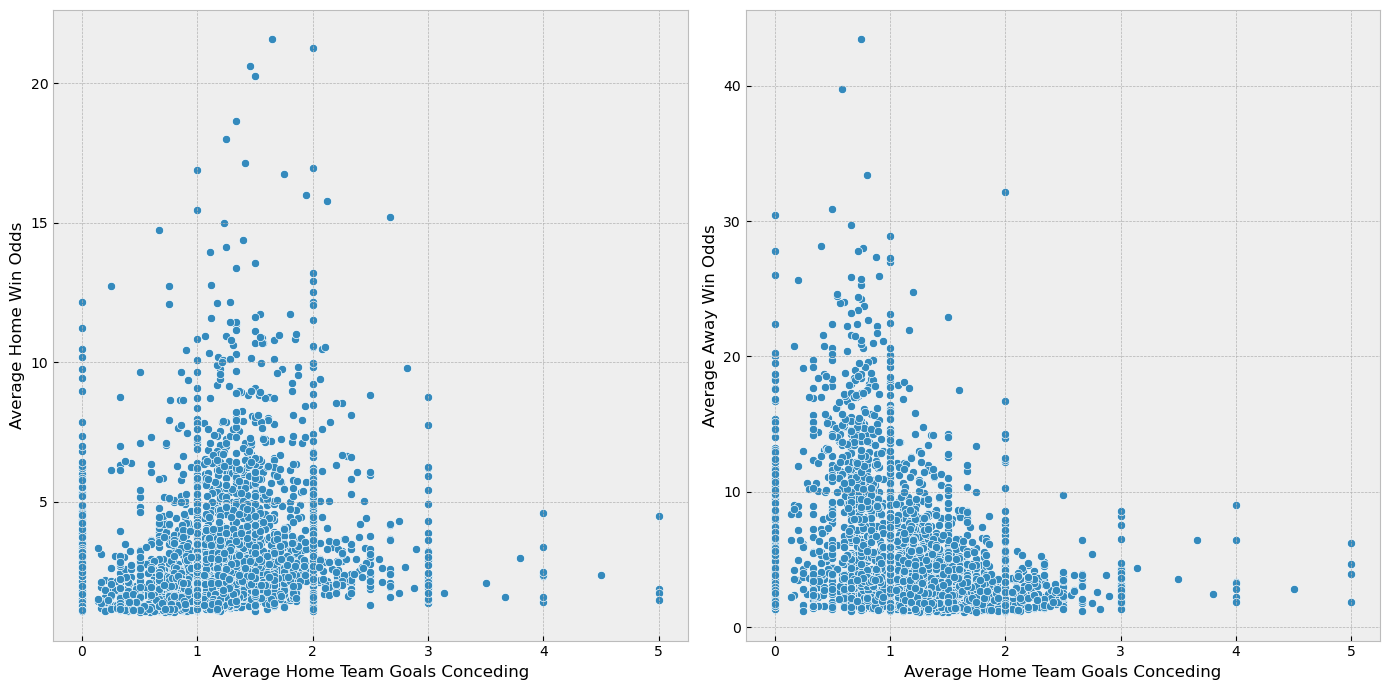

In [35]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='HCONC', y='AVGH', data=df,ax = axes[0])
axes[0].set_xlabel('Average Home Team Goals Conceding')
axes[0].set_ylabel('Average Home Win Odds')

sns.scatterplot(x='HCONC', y='AVGA', data=df,ax=axes[1])
axes[1].set_xlabel('Average Home Team Goals Conceding')
axes[1].set_ylabel('Average Away Win Odds')

We can see that when the home team doesn't concede a lot of goals the home win odds usually have lower price and the away win odds have high price. That is something that we have expected to happen, since the better stats the home team has the stronger it is. The points that have big deviation probably are after 2 or 3 matches from the beginning of the championship.

Text(0, 0.5, 'Average Home Win Odds')

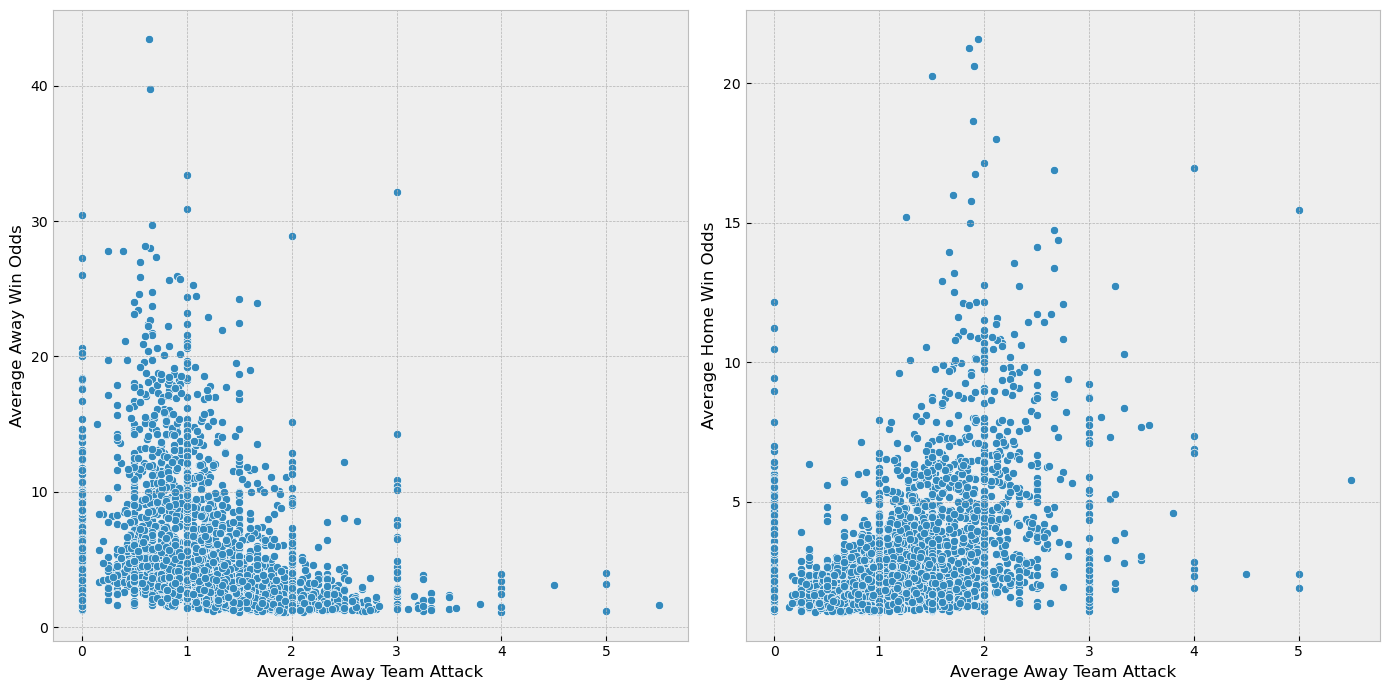

In [37]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AATT', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Attack')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='AATT', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Attack')
axes[1].set_ylabel('Average Home Win Odds')

Text(0, 0.5, 'Average Home Win Odds')

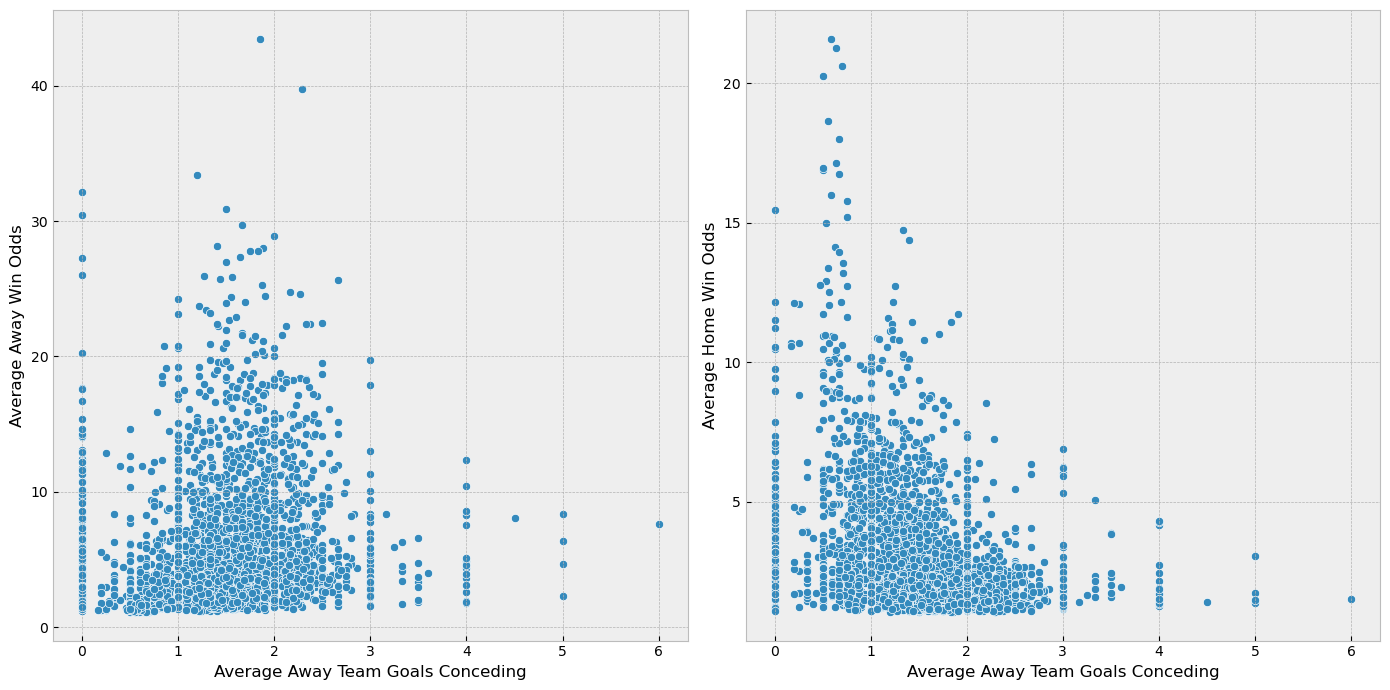

In [38]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='ACONC', y='AVGA', data=df,ax = axes[0])
axes[0].set_xlabel('Average Away Team Goals Conceding')
axes[0].set_ylabel('Average Away Win Odds')

sns.scatterplot(x='ACONC', y='AVGH', data=df,ax=axes[1])
axes[1].set_xlabel('Average Away Team Goals Conceding')
axes[1].set_ylabel('Average Home Win Odds')

As we expected the away performance stats of the teams has the same behaviour when it comes to winning odds.

Text(0, 0.5, 'Home Team Points')

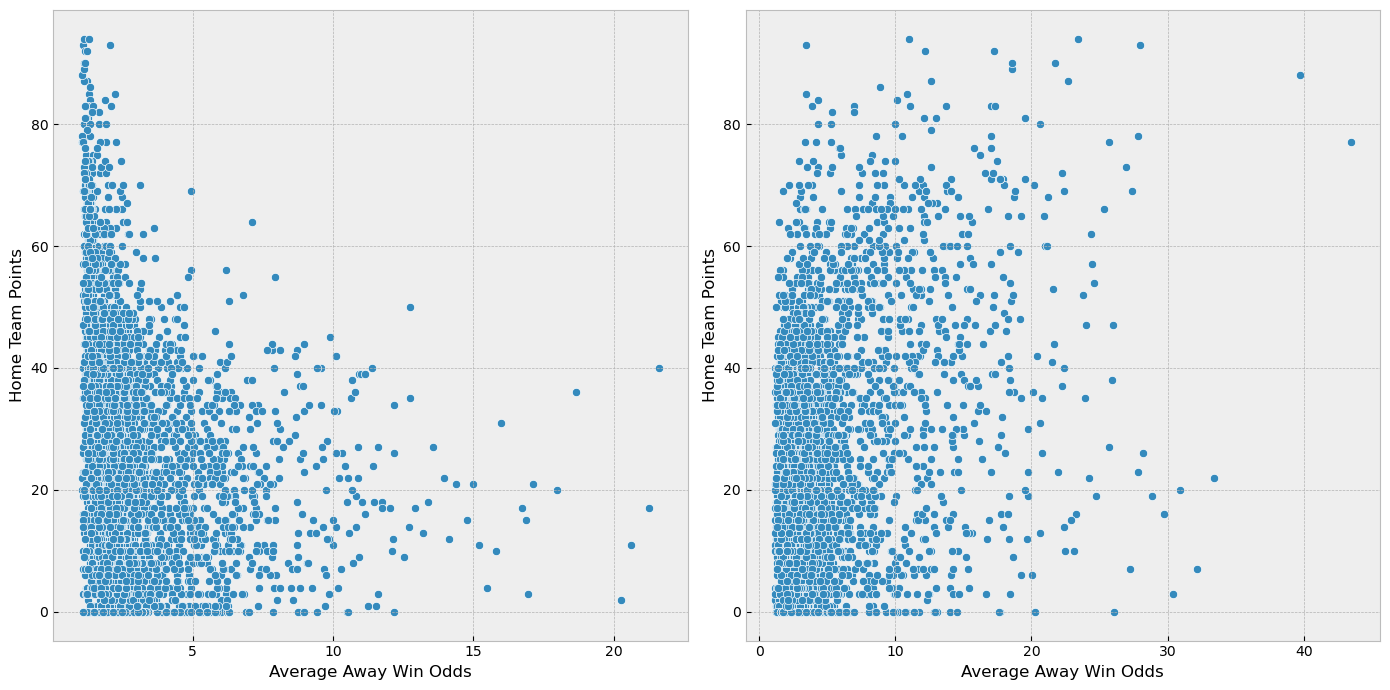

In [39]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.scatterplot(x='AVGH', y='HomeTeamPoints', data=df, ax = axes[0])
axes[0].set_xlabel('Average Away Win Odds')
axes[0].set_ylabel('Home Team Points')

sns.scatterplot(x='AVGA', y='HomeTeamPoints', data=df, ax=axes[1])
axes[1].set_xlabel('Average Away Win Odds')
axes[1].set_ylabel('Home Team Points')

Text(0, 0.5, 'Average Draw Win Odds')

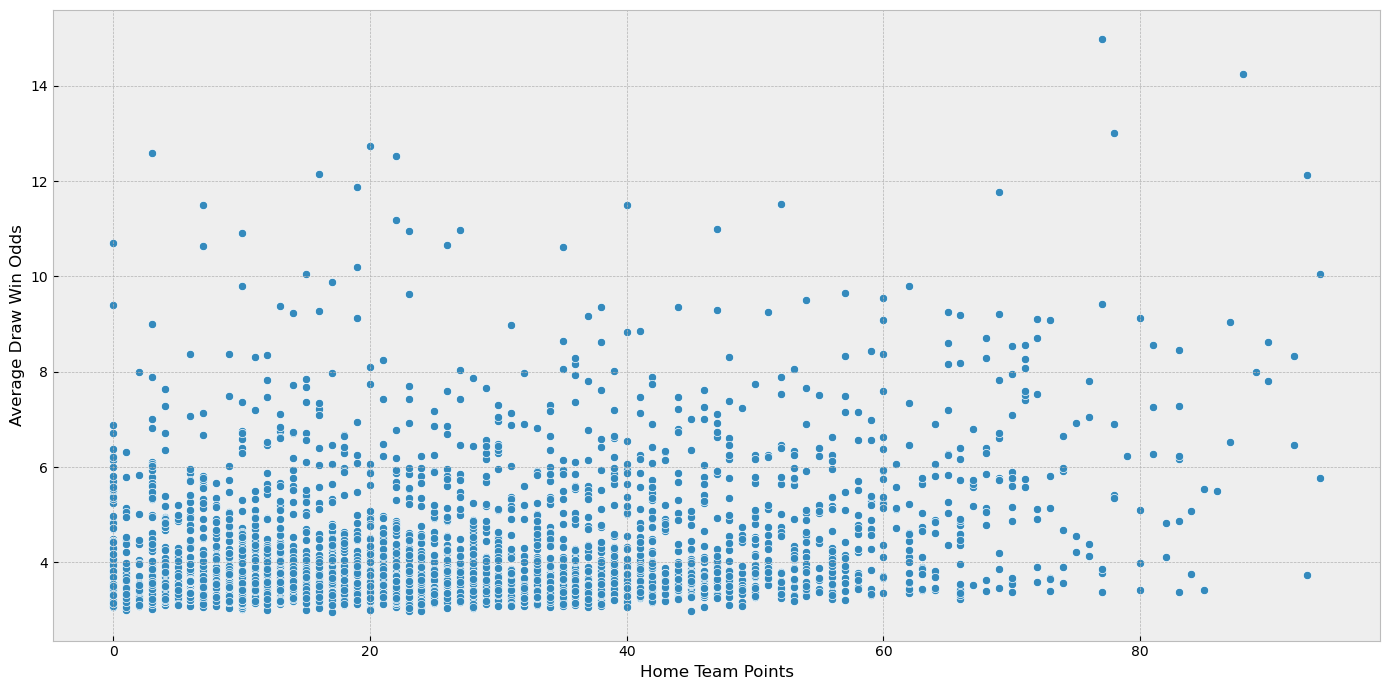

In [40]:
sns.scatterplot(x='HomeTeamPoints', y='AVGD', data=df)
plt.xlabel("Home Team Points")
plt.ylabel("Average Draw Win Odds")

The points that the home team has during the season affects the prices of the odds. Big number of points indicates that the team is strong, so the chaches for this team to win is high. As a cosnsequence the home win odd is getting lower and the other two are raising.

Text(0, 0.5, 'Average Away Win Odds')

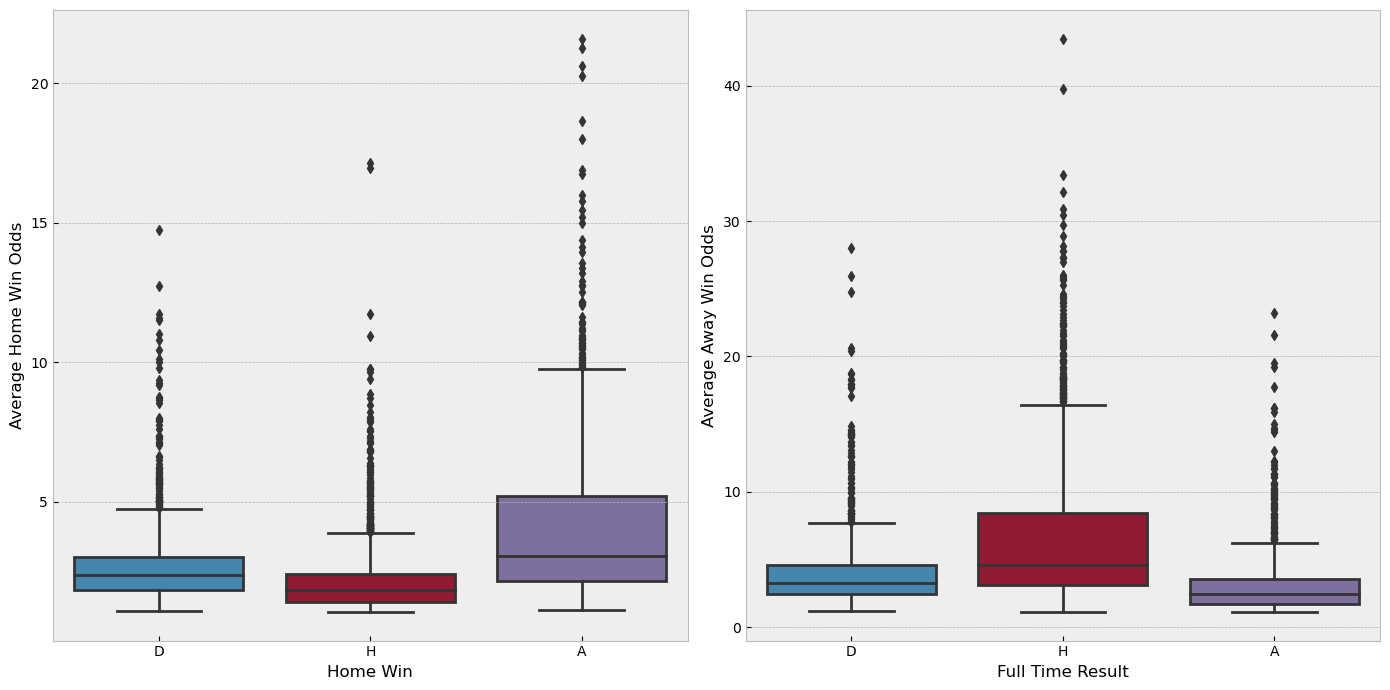

In [41]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='AVGH', data=df, ax=axes[0])
axes[0].set_xlabel('Home Win')
axes[0].set_ylabel('Average Home Win Odds')

sns.boxplot(x='FTR', y='AVGA', data=df, ax=axes[1])
axes[1].set_xlabel('Full Time Result')
axes[1].set_ylabel('Average Away Win Odds')

We can see that low values of home win or away win odds doesn't necessary mean that the favorite is going to win. There are high chances that the underdog is going to win the game or at least achieve a draw. So having the low value odds as the main betting strategy probably is going to lead you at losses.

Text(0, 0.5, 'Away Team Shots on Target')

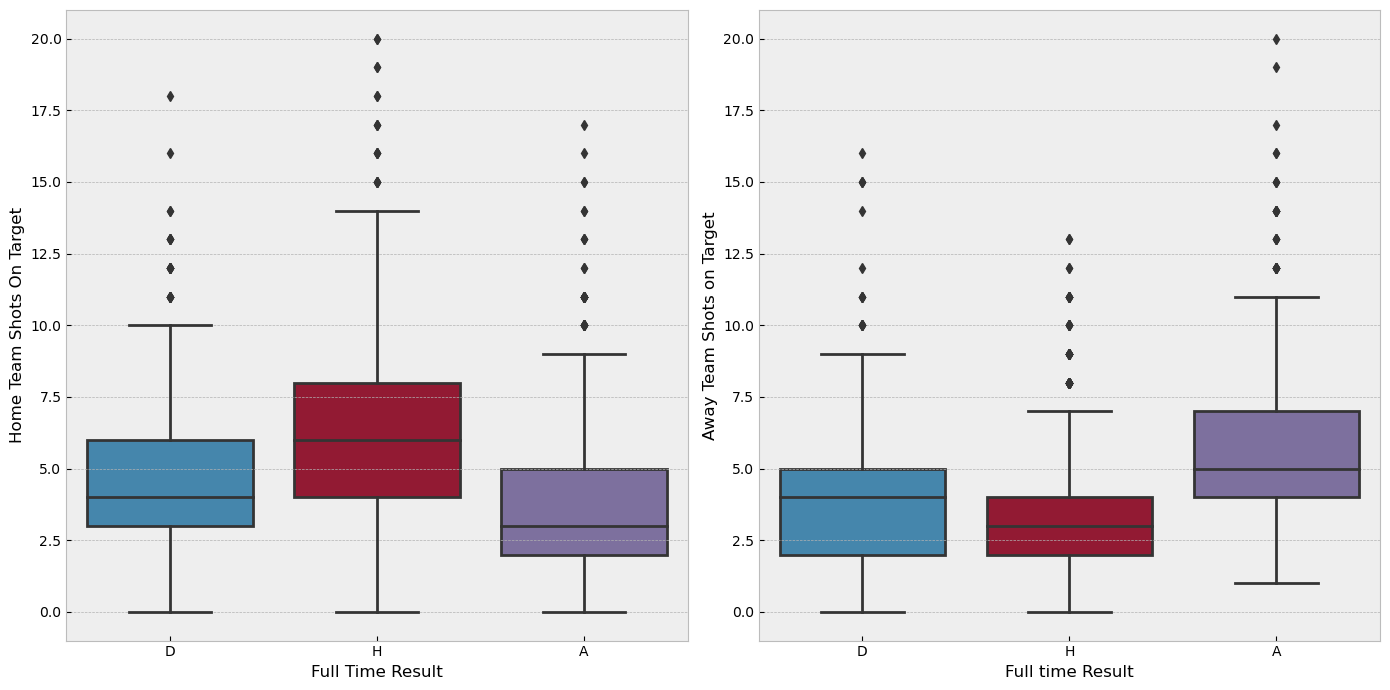

In [42]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HST', data=df, ax = axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team Shots On Target')

sns.boxplot(x='FTR', y='AST', data=df, ax=axes[1])
axes[1].set_xlabel('Full time Result')
axes[1].set_ylabel('Away Team Shots on Target')

A team that has a lot of shots on target probably is going to score a goal but that doesn't mean that this team is going to win the game. There are many cases when the team with the bigger number of shots on target didn't achieve to win. A team that creates a lot of opportunities to score for sure has higher chances to win, but stats don't always tell the whole story.

Text(0, 0.5, 'Away Team Points')

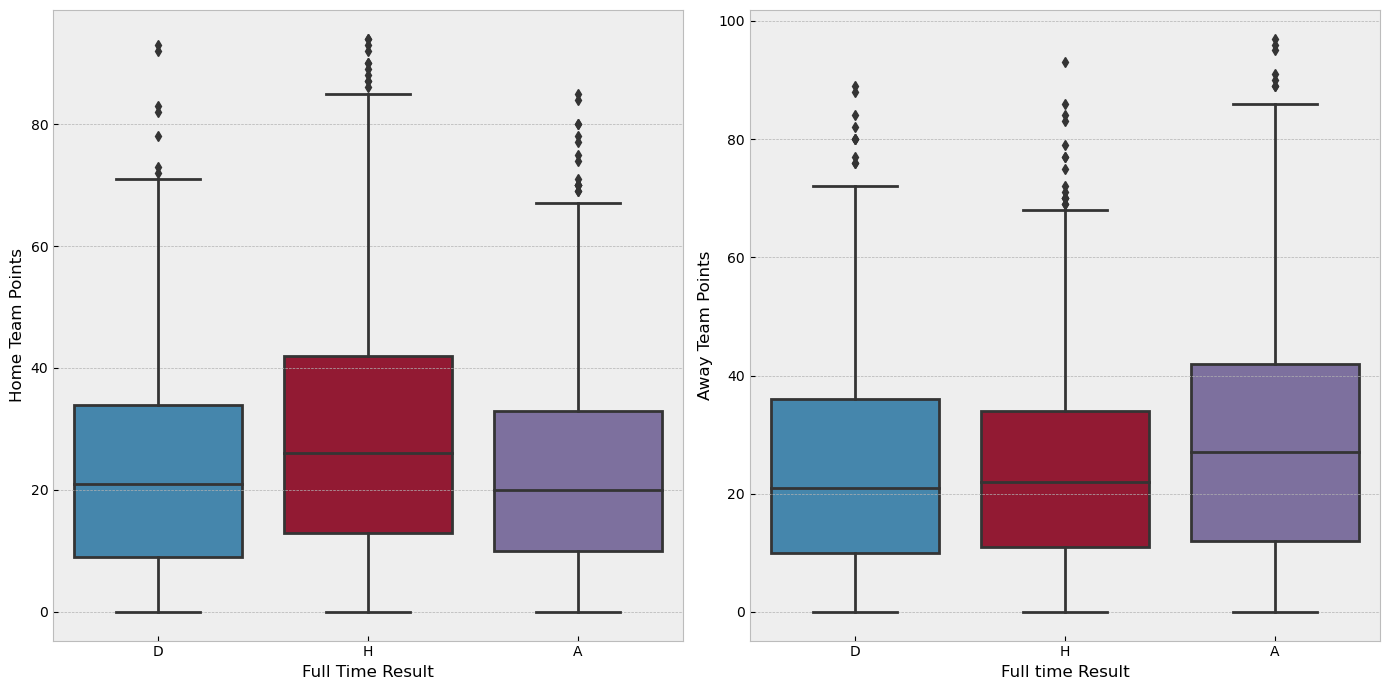

In [43]:
f, axes = plt.subplots(1, 2)
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True

sns.boxplot(x='FTR', y='HomeTeamPoints', data=df, ax = axes[0])
axes[0].set_xlabel('Full Time Result')
axes[0].set_ylabel('Home Team Points')

sns.boxplot(x='FTR', y='AwayTeamPoints', data=df, ax=axes[1])
axes[1].set_xlabel('Full time Result')
axes[1].set_ylabel('Away Team Points')

Home and team points can't by themselves compose a betting strategy. It is reasonable to check the position of each team in the table but that alone should not be a betting strategy. It is reasonable to bet that the favorite is going to win when the first team plays against the last team of the table, but that is not always the case. There are also other factors that we need to take into consideration like the motivation of each team.

Text(0, 0.5, 'Average Home Team Attack Performance')

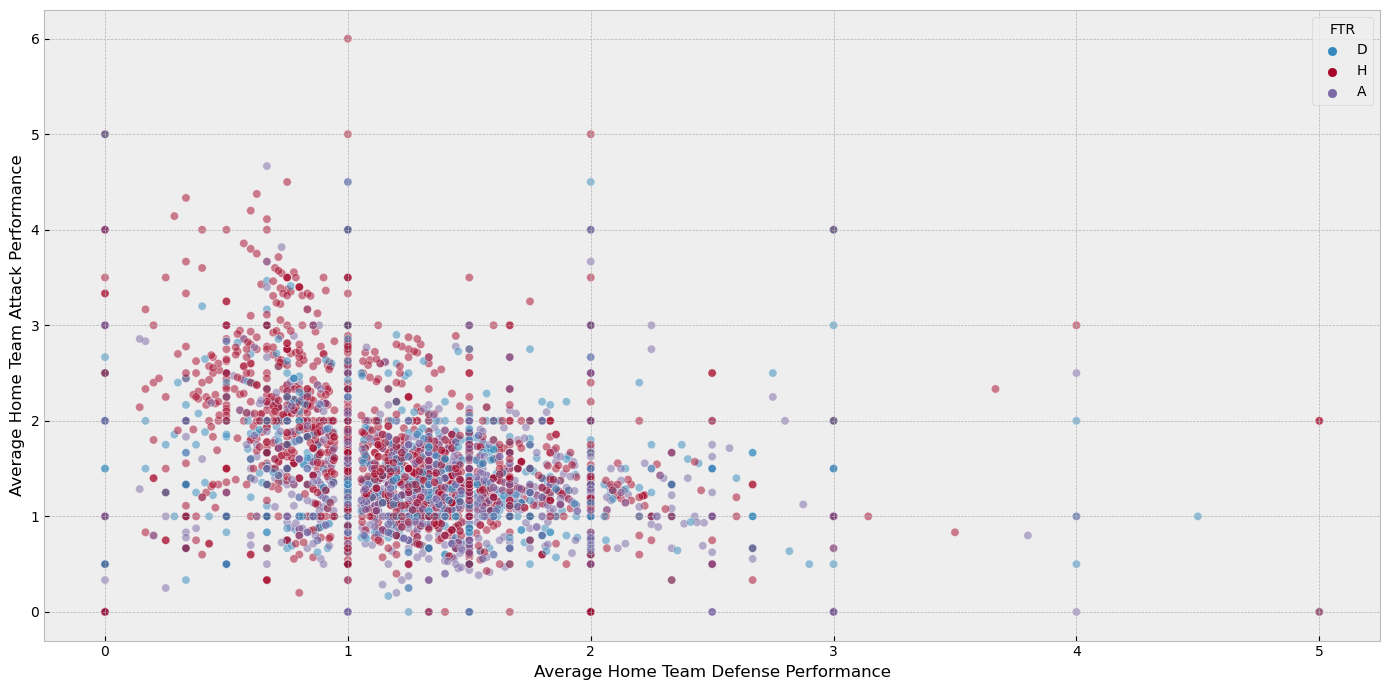

In [44]:
sns.scatterplot(x='HCONC', y='HATT', data=df,hue ='FTR', alpha=0.5)

plt.xlabel("Average Home Team Defense Performance")
plt.ylabel("Average Home Team Attack Performance")

From that plot we could say that when it comes for the home team to win the game, a strong attack seems to be more important the a strong defence. Strong defence in combination with poor performance at attack it is highly possible that will lead to a draw or a defeat.

Text(0, 0.5, 'Average Away Team Attack Performance')

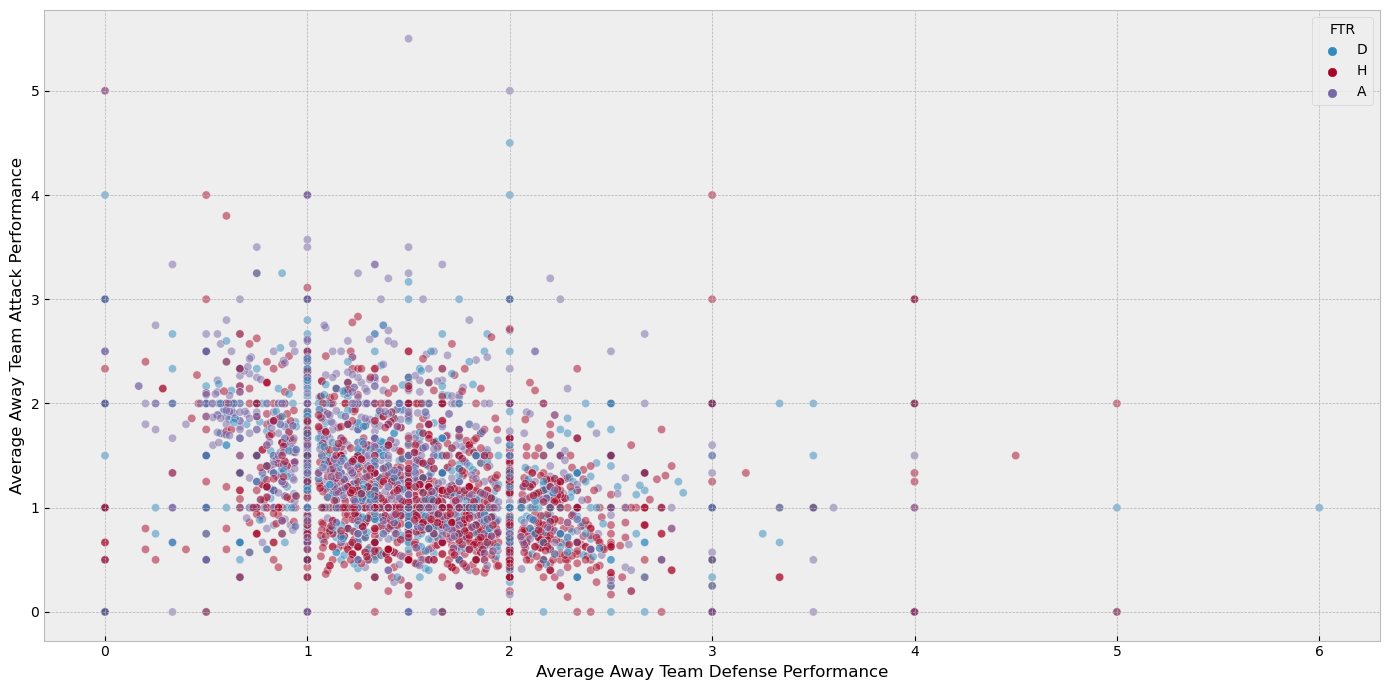

In [45]:
sns.scatterplot(x='ACONC', y='AATT', data=df,hue ='FTR', alpha=0.5)

plt.xlabel("Average Away Team Defense Performance")
plt.ylabel("Average Away Team Attack Performance")

Defence plays an important role when it comes to the guest team winning the game. When the guest team has poor defernce perfomance, even though it could score a bunvh of goals it is highly possible that it is going to lose or achieve a draw.